In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:13<00:00, 128MB/s]
100% 1.06G/1.06G [00:13<00:00, 83.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D,MaxPooling2D ,Flatten,BatchNormalization,Dropout

In [7]:
# generators

train_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/train' ,
     labels="inferred",
    label_mode="int",
     batch_size=32,
    image_size=(256, 256)
)

val_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/test' ,
     labels="inferred",
    label_mode="int",
     batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize (so that the pixel values are between 0 and 1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
val_ds =val_ds.map(process)

In [24]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding ='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding ='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 [==============================] - 75s 114ms/step - loss: 1.2660 - accuracy: 0.5627 - val_loss: 0.6952 - val_accuracy: 0.5912
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6164 - accuracy: 0.6598 - val_loss: 0.6330 - val_accuracy: 0.6502
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.5131 - accuracy: 0.7443 - val_loss: 0.5540 - val_accuracy: 0.7104
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4332 - accuracy: 0.7891 - val_loss: 0.4476 - val_accuracy: 0.7944
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3782 - accuracy: 0.8209 - val_loss: 0.4894 - val_accuracy: 0.7904
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3185 - accuracy: 0.8555 - val_loss: 0.4927 - val_accuracy: 0.7794
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2499 - accuracy: 0.8894 - val_loss: 0.5099 - val_ac

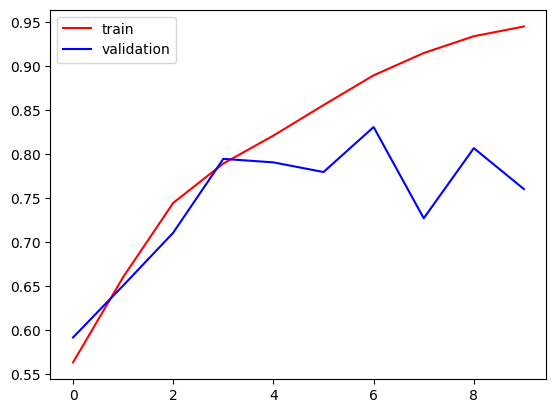

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train',c='r')
plt.plot(history.history['val_accuracy'],label='validation',c='b')
plt.legend()

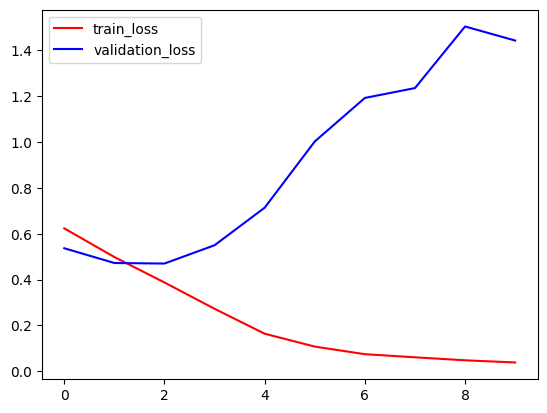

In [22]:
#before BatchNorm and dropout
plt.plot(history.history['loss'],label='train_loss',c='r')
plt.plot(history.history['val_loss'],label='validation_loss',c='b')
plt.legend()

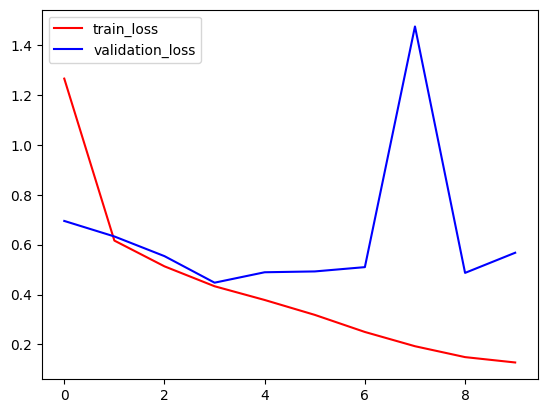

In [29]:
plt.plot(history.history['loss'],label='train_loss',c='r')
plt.plot(history.history['val_loss'],label='validation_loss',c='b')
plt.legend()

In [30]:
import cv2

In [49]:
test_img=cv2.imread('/content/download.jpg')

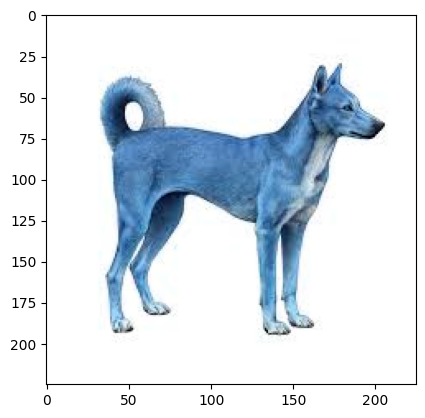

In [50]:
plt.imshow(test_img)

In [51]:
test_img.shape

(225, 225, 3)

In [52]:
test_img=cv2.resize(test_img,(256,256))

In [53]:
test_input=test_img.reshape((1,256,256,3))

In [55]:
pred=model.predict(test_input)
if pred ==0:
  print('Cat')
elif pred ==1:
  print('Dog')

1/1 [==============================] - 0s 27ms/step
Dog
